<a href="https://colab.research.google.com/github/AryaSuryaaa/Pengembangan-Machine-Learning/blob/main/TA_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>I Kadek Arya Surya Saputra</h1>
suryasaputra914@gmail.com



<h2>Submission Akhir Belajar Pengembangan Machine Learning</h2>
<p>Image Classification Model Deployment</p>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
import os
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [ ]:
# Split dataset menjadi direktori train dan val, serta membuat sub-direktori untuk kategori-kategori gambar
base_dir = r"C:\Users\surya\Documents\MachineLearning\ShoeSandalBootDataset\Shoe vs Sandal vs Boot Dataset"


os.listdir(base_dir)

['Boot', 'model.tflite', 'Sandal', 'Shoe']

In [ ]:
subdirectories = [
    'Boot', 'Sandal', 'Shoe'
]

total_images_all = 0

# Loop untuk membuat variabel dan melihat isi setiap sub direktori
for sub_dir in subdirectories:
    sub_path = os.path.join(base_dir, sub_dir)
    exec(f"{sub_dir.lower()} = sub_path")  # Membuat variabel sub direktori
    total_images = len(os.listdir(sub_path))
    total_images_all += total_images
    print(f'total {sub_dir} images :', total_images)

    # Menampilkan total gambar dari semua sub direktori
print(f'Total images from all subdirectories: {total_images_all}')

total Boot images : 5000
total Sandal images : 5000
total Shoe images : 5000
Total images from all subdirectories: 15000


In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

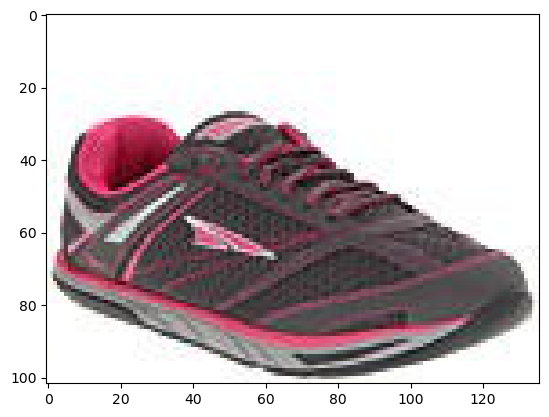

In [ ]:
imgShoe = image.load_img(r"C:\Users\surya\Documents\MachineLearning\ShoeSandalBootDataset\Shoe vs Sandal vs Boot Dataset\Shoe\Shoe (5000).jpg")
imgplot = plt.imshow(imgShoe)

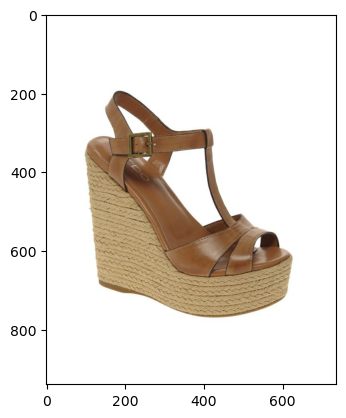

In [ ]:
imgSandal = image.load_img(r"C:\Users\surya\Documents\MachineLearning\ShoeSandalBootDataset\Shoe vs Sandal vs Boot Dataset\Sandal\Sandal (5000).jpg")
imgplot = plt.imshow(imgSandal)

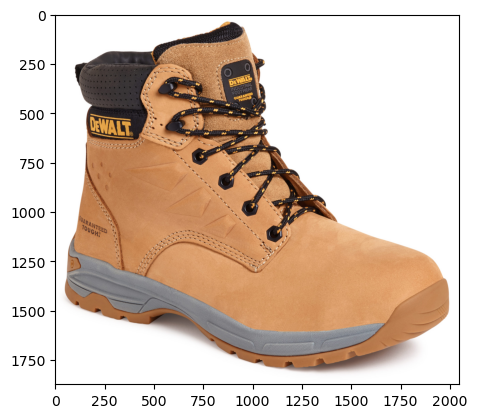

In [ ]:
imgBoot = image.load_img(r"C:\Users\surya\Documents\MachineLearning\ShoeSandalBootDataset\Shoe vs Sandal vs Boot Dataset\Boot\boot (5000).jpg")
imgplot = plt.imshow(imgBoot)

In [ ]:
# ImageDataGenerator kita tidak perlu susah payah membagi direktori secara manual, cukup dengan menggunakan parameter validation_split
# Dengan parameter tersebut, kita hanya cukup memberi tahu ImageDataGenerator mana data untuk training dan mana data untuk testing dengan menambahkan parameter subset dengan nilai training atau validation.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.2) # set validation split

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [ ]:
# buat arsitektur dari model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),  # Kurangi dropout menjadi 0.2
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),  # Kurangi dropout menjadi 0.2
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Memeriksa akurasi pada dataset pelatihan dan validasi
        if logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92:
            print("\nAkurasi pada dataset pelatihan dan validasi melampaui 92%, menghentikan proses pelatihan!")
            self.model.stop_training = True

# Membuat instance dari callback yang telah didefinisikan
callbacks = MyCallback()

In [ ]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=50, verbose=2, callbacks=[callbacks])

Epoch 1/50


1500/1500 - 545s - loss: 0.4815 - accuracy: 0.7987 - val_loss: 0.2351 - val_accuracy: 0.9160 - 545s/epoch - 363ms/step
Epoch 2/50
1500/1500 - 310s - loss: 0.2528 - accuracy: 0.9069 - val_loss: 0.1870 - val_accuracy: 0.9323 - 310s/epoch - 206ms/step
Epoch 3/50

Akurasi pada dataset pelatihan dan validasi melampaui 92%, menghentikan proses pelatihan!
1500/1500 - 248s - loss: 0.1852 - accuracy: 0.9332 - val_loss: 0.1562 - val_accuracy: 0.9413 - 248s/epoch - 165ms/step


In [ ]:
import matplotlib.pyplot as plt

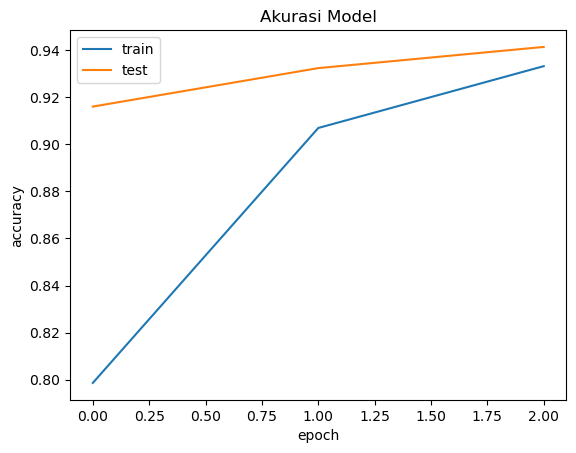

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

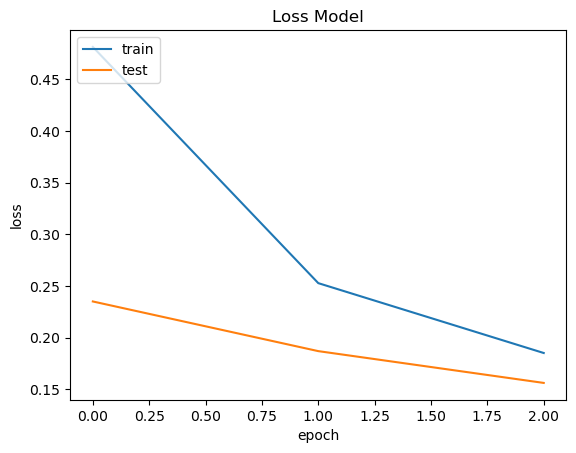

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
saved_dir = r"C:\Users\surya\Documents\MachineLearning\ShoeSandalBootDataset"


# Menyimpan model dalam format SavedModel
export_dir = os.path.join(saved_dir, 'saved_model/')
tf.saved_model.save(model, export_dir)

# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

# Menentukan path untuk menyimpan model.tflite
tflite_model_file = os.path.join(saved_dir, 'model.tflite')

# Menyimpan model.tflite
with open(tflite_model_file, 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\surya\Documents\MachineLearning\ShoeSandalBootDataset\saved_model/assets


INFO:tensorflow:Assets written to: C:\Users\surya\Documents\MachineLearning\ShoeSandalBootDataset\saved_model/assets
